In [0]:
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
cd '/content/drive/My Drive/CSCE_689'

/content/drive/.shortcut-targets-by-id/188Eba_cLfN68Gy_4d0czpAJtiCmTs8jW/CSCE_689


In [0]:
## Use generators 
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"Train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"Test", target_size=(224,224))


Found 11824 images belonging to 2 classes.
Found 7745 images belonging to 2 classes.


In [0]:
#Import Model
from tensorflow.keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

574717952/574710816 [==============================] - 4s 0us/step


In [0]:
vggmodel.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from tensorflow.keras.layers import LSTM, Lambda, Reshape,Flatten,TimeDistributed
import keras.backend as K
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

Using TensorFlow backend.


In [0]:
#Add output classifying layer
X= vggmodel.layers[-2].output
predictions = (Dense(2, activation="softmax"))(X)
model_final = Model(vggmodel.input,  predictions)

In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.00001), metrics=["accuracy"])

In [0]:
model_final.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 50, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save("vgg16_2.h5")

Epoch 1/50
2/2 [==============================] - 24s 12s/step - loss: 1.2072 - accuracy: 0.6406 - val_loss: 1.0865 - val_accuracy: 0.4375
Epoch 2/50
2/2 [==============================] - 24s 12s/step - loss: 0.8121 - accuracy: 0.7969 - val_loss: 2.2671 - val_accuracy: 0.2188
Epoch 3/50
2/2 [==============================] - 24s 12s/step - loss: 0.6337 - accuracy: 0.7500 - val_loss: 1.3602 - val_accuracy: 0.3125
Epoch 4/50
2/2 [==============================] - 23s 12s/step - loss: 0.4450 - accuracy: 0.7969 - val_loss: 0.5630 - val_accuracy: 0.7500
Epoch 5/50
2/2 [==============================] - 24s 12s/step - loss: 0.6337 - accuracy: 0.8125 - val_loss: 1.0039 - val_accuracy: 0.5625
Epoch 6/50
2/2 [==============================] - 25s 12s/step - loss: 0.6937 - accuracy: 0.8281 - val_loss: 0.4046 - val_accuracy: 0.7812
Epoch 7/50
2/2 [==============================] - 23s 11s/step - loss: 0.5851 - accuracy: 0.8281 - val_loss: 0.4311 - val_accuracy: 0.8125
Epoch 8/50
2/2 [===========

In [0]:
model_final.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

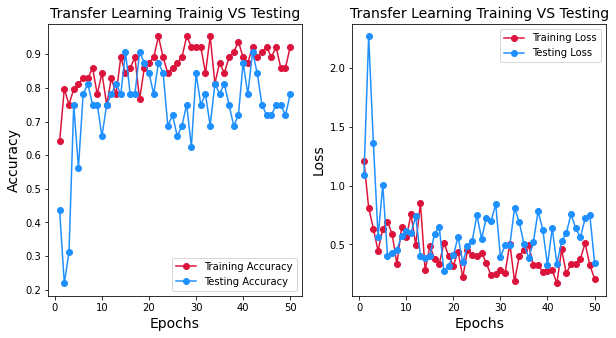

In [0]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(model_final.history.history['accuracy']) + 1), model_final.history.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(model_final.history.history['val_accuracy']) + 1), model_final.history.history['val_accuracy'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('Transfer Learning Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(model_final.history.history['loss']) + 1), model_final.history.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(model_final.history.history['val_loss']) + 1), model_final.history.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('Transfer Learning Training VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

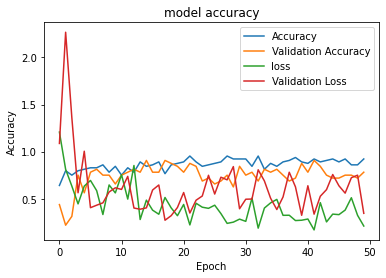

In [0]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Get Labels on validation videos

In [0]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import os
labels=np.load("labels.npy")
vid=np.load("vid.npy")
time=np.load("time.npy")
model_final=load_model("vgg16_2.h5")

In [0]:
totaldata=pd.DataFrame()
totaldata['label']=time
totaldata['vid']=vid

In [0]:
# totaldata[totaldata.vid==50]

,label,vid
40846,0.00,50
40847,0.05,50
40848,0.10,50
40849,0.15,50
40850,0.20,50
...,...,...
42510,83.20,50
42511,83.25,50
42512,83.30,50
42513,83.35,50


### Test

In [0]:
#Frames of all 100 videos
listed=[d[1] for d in list(enumerate(os.listdir(r"All")))] #Prediction for test
listed.sort()

In [0]:
len(listed)

64749

In [0]:
import pandas as pd
import os
import numpy as np
outputs=[]
pred_rnn=[]
pred_proba=[]
j=0
for i in listed:
    # print(str(i))
    # print(e)
    print(i)
    output=[]
    img = image.load_img(os.path.join(r"Prediction_train",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model_final.predict(img)
    outputs.append(output)
    # print(output)
    if output[0][0] >= output[0][1]:
        pred_rnn.append(0)   
    else:
        pred_rnn.append(1)
    pred_proba.append(output[0][1])
    j+=1

Streaming output truncated to the last 5000 lines.
109762.jpg
109763.jpg
109764.jpg
109765.jpg
109766.jpg
109767.jpg
109768.jpg
109769.jpg
109770.jpg
109771.jpg
109772.jpg
109773.jpg
109774.jpg
109775.jpg
109776.jpg
109777.jpg
109778.jpg
109779.jpg
109780.jpg
109781.jpg
109782.jpg
109783.jpg
109784.jpg
109785.jpg
109786.jpg
109787.jpg
109788.jpg
109789.jpg
109790.jpg
109791.jpg
109792.jpg
109793.jpg
109794.jpg
109795.jpg
109796.jpg
109797.jpg
109798.jpg
109799.jpg
109800.jpg
109801.jpg
109802.jpg
109803.jpg
109804.jpg
109805.jpg
109806.jpg
109807.jpg
109808.jpg
109809.jpg
109810.jpg
109811.jpg
109812.jpg
109813.jpg
109814.jpg
109815.jpg
109816.jpg
109817.jpg
109818.jpg
109819.jpg
109820.jpg
109821.jpg
109822.jpg
109823.jpg
109824.jpg
109825.jpg
109826.jpg
109827.jpg
109828.jpg
109829.jpg
109830.jpg
109831.jpg
109832.jpg
109833.jpg
109834.jpg
109835.jpg
109836.jpg
109837.jpg
109838.jpg
109839.jpg
109840.jpg
109841.jpg
109842.jpg
109843.jpg
109844.jpg
109845.jpg
109846.jpg
109847.jpg
109

In [0]:
y_shaped_test=np.array(labels)
# pred_rnn=np.array(pred)
pred_rnn=np.array([int(d) for d in pred_rnn])

In [0]:
y_shaped_test=y_shaped_test[:len(pred_rnn)]

In [0]:
## Prediction, Accuracy, F1-score, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics


acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn),average='micro')
print([acc10, f1_score_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.8408536585365853, 0.8408536585365853]
[[10748   775]
 [ 1574  1663]]


In [0]:
len(pred_rnn)

14760